# <font color='blue'> Análisis Estadístico de Parámetros de Estado Estable 

Por lo general, los estudios de simulación se realizan para determinar el valor de cierta cantidad $\theta$ relacionada con el modelo estocástico particular. Una simulación del sistema en cuestión produce los datos de salida $X$, una variable aleatoria cuyo valor esperado es la cantidad de interés $\theta$, y se realiza durante $n$ ejecuciones. 

El promedio de estos $n$ valores, 

<font color='red'>$$\bar{X} = \sum_{i=1}^n \frac{X_i}{n}$$

sirve como estimador, o aproximador de $\theta$. Este promedio aritmético es la **media muestral**.

Para determinar la "bondad" de $\bar{X}$ como estimador de la media poblacional $\theta$, consideramos el error cuadrático medio:

$$\mathbb{E}[(\bar{X}-\theta)^2]=\mathbb{Var}(\bar{X})=\frac{\sigma^2}{n}$$

donde $\mathbb{E}[\bar{X}]=\theta$ y $\mathbb{Var}(X_i)=\sigma^2$

Entonces, $\bar{X}$ es un buen estimador de $\theta$ cuando $\frac{\sigma}{\sqrt{n}}$ es pequeño.

La dificultad de este indicador de bondad es que por lo general no se conoce la varianza poblacional $\sigma^2$, así que también debe estimarse.

Para ello se usa la varianza muestral, $S^2$:

<font color='red'>$$S^2=\frac{\sum_{i=1}^n (X_i-\bar{X})^2}{n-1}$$

$S^2$ es la **varianza poblacional** y $s=\sqrt{S^2}$ es la **desviación estándar muestral**.

### <font color='blue'> Ejercicio

Estimemos el valor de la integral $\int_0^1 \sqrt( \arctan x ) dx$.

Modificar el ejercicio ya realizado para obtener una estimación de la integral y una medida de su bondad. 

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Definimos la función de prueba.
def funcion(x):
    return np.sqrt(np.arctan(x)) 

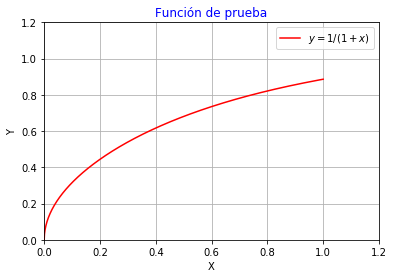

In [17]:
#Graficamos la función de prueba.
X=np.linspace(0,1,1000)
plt.plot(X,funcion(X), color='red', label="$y=1/(1+x)$")
#plt.fill_between(X,funcion(X))
plt.legend()
plt.xlim(0.0, 1.2)
plt.ylim(0.0, 1.2)
plt.grid(True)
plt.title('Función de prueba', color='b')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [14]:
def integ(func=funcion, n=3000):
    muestreo=[]
    suma=[]
    for i in range(n):
        u= np.random.random_sample()
        muestreo.append(u)
        y=funcion(u)
        suma.append(y)

    return np.mean(suma), np.std(suma)

print("El valor de la integral es:", round(integ()[0],5))
print("El error estándar es:", round(integ()[1],5))

El valor de la integral es: 0.62767
El error estándar es: 0.20433


### Método para determinar cuando detenerse al generar nuevos datos

1. Elegir un valor aceptable $d$ para la desviación estándar del estimador.

2. Generar al menos 30 datos.

3. Continuar generando más datos, hasta detenerse cuando se hayan generado $k$ valores y $\frac{S}{\sqrt{k}}<d$, donde $S$ es la desviación estándar muestral basada en estos $k$ valores.

4. La estimación de $\theta$ está dada por $\bar{X}=\sum_{i=1}^k \frac{X-i}{k}$.